Kernel → How you look at neighbors ("Look at 3x3 neighbourhood", "Look at the 3 neighbours above") (small number of pixels)

Mask → Where something is allowed ("Only allow operations on the image where intensity=255") (basically a binary image), useful term when performing an operation on an image that take both an image AND a mask, e.g. bitwise and. In these cases, the mask can be created by creating a binary image, then dilate it to make the allowed area bigger etc, abd then apply it to the image


Seed → Where something starts, e.g. filling an area based on constraints that make the process end somehwere

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('PCB.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

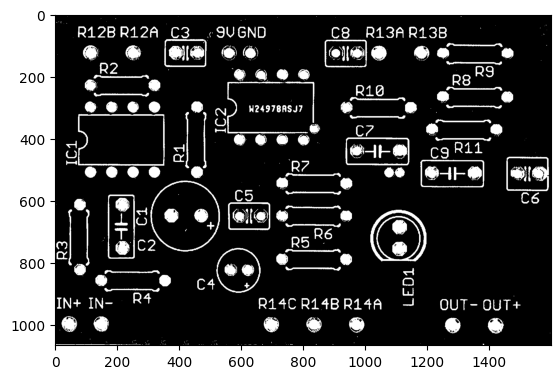

In [3]:
# Otsu's thresholding, automatic threshold value selection, the input threshold is ignored
# Is always combined with other thresholding methods
# The default is binary thresholding
threshold_value = 0  # ignored when using Otsu's method
ret, thre = cv2.threshold(image_gray, threshold_value, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thre, cmap='gray')

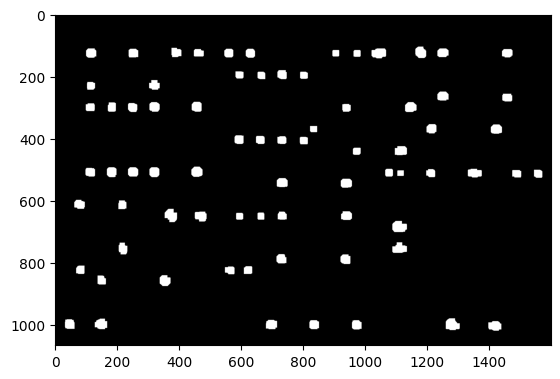

In [4]:
kernel = np.ones((17,17), np.uint8)
# Opening : Erosion followed by Dilation, to remove noise / small objects
opened = cv2.morphologyEx(thre, cv2.MORPH_OPEN, kernel)
plt.imshow(opened, cmap='gray')

In [5]:
# Define local regions for morphological operations
# i.e. find contours
contours, report = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Contours is a list of all detected contours
# Each contour is represented as a numpy array of (x,y) coordinates of boundary pixels
# So len(countours) = number of found contours
# And contours[0] is the first contour found, and len(contours[0]) is the number of pixels in that contour
# And contours[0][0] is the first point in that contour, and contours[0][0][0] is the x coordinate of that pixels




A contour is essentially an ordered list of foreground pixels that neighbour a background pixel. The order is that two neighbouring pixels in the list are also neighbours (as are the first and the last).

cv2.CHAIN_APPROX_NONE does that.

cv2.CHAIN_APPROX_SIMPLE only add the pixels that include a direction change, i.e. the corner pixels of the contour / the endpoints of straight lines. 

cv2.RETR_EXTERNAL gives ONLY the outer contour, i.e. if there is a hole in the object, these contours are not returned. If the inner contours should also be returned (or even more complex examples like nested donuts), use other parameters.

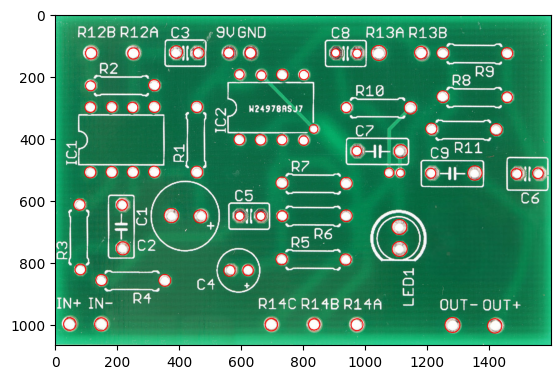

In [ ]:
circle_img = image.copy()
for contour in contours:
    ((center_x, center_y), radius) = cv2.minEnclosingCircle(contour)
    cv2.circle(circle_img, center=(int(center_x), int(center_y)), radius= int(radius), thickness = 2, color=(255,0,0))

plt.imshow(circle_img)